# Project Introduction

The dataset used for this project contains data gathered by the New York City Taxi & Limousine Commission. For each trip, there are multiple data gathered as seen in the dictionary below. The main goal of this project is to build a model that can predict the "total_amount" or final cost of a trip before the trip is taken so that this price may be shown to prospective riders to increase sales since buyers are more likely to buy a service when they know what they are getting.**<sup>1</sup>** Also it's important to note that for the purposes of this project we are making the assumption that riders enter in the relevant information (Mainly Pickup/Dropoff Location from which many other variables can be derived) prior to booking the ride, the same way you would if you were using UBER for example.

<sup>1</sup><sub>[Pricing and the Psychology of Consumption-Harvard Business Review](https://hbr.org/2002/09/pricing-and-the-psychology-of-consumption)</sub>

## Data Dictionary / Feature Definitions

**ID**: Trip identification number.

**VendorID**: A code indicating the TPEP provider that provided the record.

        1= Creative Mobile Technologies, LLC;

        2= VeriFone Inc.

**tpep_pickup_datetime**: The date and time when the meter was engaged.

**tpep_dropoff_datetime**: The date and time when the meter was disengaged.

**Passenger_count**: The number of passengers in the vehicle. This is a driver-entered value.

**Trip_distance**: The elapsed trip distance in miles reported by the taximeter.

**PULocationID**: TLC Taxi Zone in which the taximeter was engaged.

**DOLocationID**: TLC Taxi Zone in which the taximeter was disengaged.

**RateCodeID**: The final rate code in effect at the end of the trip.

        1= Standard rate

        2= JFK

        3= Newark

        4= Nassau or Westchester

        5= Negotiated fare

**Store_and_fwd_flag**: This flag indicates whether the trip record was held in vehicle memory before being sent to
                           the vendor, aka “store and forward,” because the vehicle did not have a connection to the
                           server.

        Y= store and forward trip

        N= not a store and forward trip

**Payment_type**: A numeric code signifying how the passenger paid for the trip.

        1= Credit card

        2= Cash

        3= No charge

        4= Dispute

        5= Unknown

        6= Voided trip

**Fare_amount**: The time-and-distance fare calculated by the meter.

**Extra**: Miscellaneous extras and surcharges. This only includes the $0.50 and $1 rush hour and overnight charges.

**MTA_tax**: $0.50 MTA tax that is automatically triggered based on the metered rate in use.

**Improvement_surcharge**: $0.30 improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015.

**Tip_amount**: Tip amount - This field is automatically populated for credit card tips. Cash tips are not included.

**Tolls_amount**: Total amount of all tolls paid on the trip.

#### Overview of the features and their importance to the objective. See if there are any columns that can be dropped.

`Trip ID`: A unique numerical identification for each trip

`Vendor ID`: There are two vendors in this dataset and they may have different rates they charge with their taxis.

`Pickup Datetime`: These values can be used to analyze if certain times in the day have more or less demand and thus may incur a premium due to the laws of supply/demand. If certain times can be proven to be more expensive, we can then use this to predict final cost.

`Dropoff Datetime`: These values would not be available when our model is deployed, and although we could make the assumption that we could estimate this time, for the purposes of this project that assumption will not be made.

`Passenger Count`: Since we don't know the ins and outs of the policies at these taxi companies, drivers may be permitted to charge a premium based on certain amounts of riders, so this feature will need investigation as it may be useful.

`Trip Distance`: We would expect this to be the feature with the highest correlation with the final cost of the ride.

`Pickup/Dropoff Location`: These values can be used to analyze if certain zones have more or less traffic and thus take the taxi driver longer to navigate them making the ride run longer which would increase the final cost of the ride.

`Ratecode`: This variable will need investigation as to how much of an effect it has on the final cost

`Store & Forward Flag`: This variable is not expected to be valuable in predicting the final cost since it only tracks information that is gathered after the ride has taken place.

`Payment Type`: We will need to check whether it makes a difference whether a rider pays by cash or card.

`Fare Amount`: Since this feature is made up of other features which will be included in the final model, it is not necessary to include, since it will add undue additional weight to those features comprising it.

`Extra`: This is a variable taken down after the ride is over and it is not available beforehand, but since it only tracks certain premiums based on the time of day we can make binary columns in the dataset based off of the datetime to track it instead.

`MTA Tax`: A nearly perfectly static 50 cent charge applied after the ride ends, its value is included in the final cost already so this column is not necessary.

`Improvement Surcharge`: A static 30 cent charge on every ride, provides no predictive power since it never changes

`Tip Amount`: Since tips are a variable controlled by the rider it can't reliably be used as a predictor, even if we knew who was taking the ride and could remember their previous tips, it likely would not provide much value. We will need to create a new column in the data set that tracks the subtotal of the ride (total_amount without tips) and then try to predict that instead.

`Tolls Amount`: This is another variable we would not have prior to the ride being completed, and since we do not have the data or capabilities within this setting to gather data and route information to estimate what tolls may be paid during the course of the trip, we will have to accept this value being added to the total and remove what variance we can by with the pickup and dropoff locations, since they may correlate with the tolls.

`Total Amount`: As mentioned above we will be creating a new final cost column called subtotal, which is this value with tips subtracted.

#### **In conclusion**,
the features we will remove will be: `Trip ID`, `Store_and_fwd_flag`, `Extra`, `MTA_tax`, `Improvement_surcharge`, `Tip_amount`, `Tolls_amount`, `Total_amount`. But for now we will need to keep all the features that affect the subtotal, since we want to identify outliers. And we will keep `fare_amount` and `total_amount` should we want them for visualization purposes. So let's load in the data and drop these columns, but first we need to import some modules.

## Drop, Add, and Type-Correct Columns

In [1]:
import pandas as pd, seaborn as sns, numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("taxicab_original.csv")

# Create what will be the column we want to predict, subtotal, which is the total_amount - tip_amount, for reasons stated above.
subtotal = data["total_amount"] - data["tip_amount"]

# Inserts "subtotal" just behind total_amount instead of at the end since it makes more logical sense for it to be here. 
insert_position = len(data.columns) - 1
df = data.copy()
df.insert(insert_position, "subtotal", subtotal)

# Drop all specified columns
df = df.drop(columns=["Unnamed: 0", "tpep_dropoff_datetime",  "store_and_fwd_flag"]).copy()

Now let's examine the data types of our remaining features

We have one column, `tpep_pickup_datetime`, that we want as a datetime object so we will convert it.

In [3]:
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])

In [4]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
subtotal                        float64
total_amount                    float64
dtype: object

Since we're here already let's add some columns derived from the pickup time, one for the hour of the pickup (0-23), one for the day of pickup (Mon-Sun), one for the month (Jan-Dec) and one final binary column to account for whether the pickup time was during rush hour (defined here as the hours 6,7,8 & 9 in the morning and 4,5,6, & 7 in the evening, weekends being excluded) After this we can safely remove the `tpep_pickup_datetime` column since we have all of its important information split into these new columns

In [5]:
hour = df['tpep_pickup_datetime'].dt.hour
day = df['tpep_pickup_datetime'].dt.day_name().str.lower()
month = df['tpep_pickup_datetime'].dt.month_name().str.lower()

df.insert(2, "hour", hour)
df.insert(3, "day", day)
df.insert(4, "month", month)

def is_rush_hour(hour, day):
    return ((6 <= hour < 10) or (16 <= hour < 20)) and ((day != "saturday") and (day != "sunday"))
rush_hour = df.apply(lambda x: 1 if is_rush_hour(x["hour"], x["day"]) else 0, axis = 1)

df.insert(3, "rush_hour", rush_hour)

df = df.drop(columns=["tpep_pickup_datetime"])

Let's make one more new column that will track the $/Mi rate of the trip called `ride_rate`, so that we can compare some of the variables later irrespective of the influence that `trip_distance` will have on the data. We will also impute a value of 0 for any rows that have a 0 for trip distance or fare amount.

In [6]:
ride_rate = np.where((df["fare_amount"] > 0) & (df["trip_distance"] > 0), df["fare_amount"] / df["trip_distance"], 0)

# Insert the ride_rate column into the DataFrame at position 6
df.insert(7, "ride_rate", ride_rate)

In [7]:
df.describe()

,VendorID,hour,rush_hour,passenger_count,trip_distance,ride_rate,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,subtotal,total_amount
count,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,1.556236,13.726552,0.296753,1.642319,2.913313,7.369462,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,14.474721,16.310502
std,0.496838,6.224675,0.456837,1.285231,3.653171,71.809223,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,14.051942,16.097295
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,-120.300000
25%,1.000000,9.000000,0.000000,1.000000,0.990000,4.292387,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,7.800000,8.750000
50%,2.000000,14.000000,0.000000,1.000000,1.610000,5.500000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,10.300000,11.800000
75%,2.000000,19.000000,1.000000,2.000000,3.060000,7.051282,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,15.800000,17.800000
max,2.000000,23.000000,1.000000,6.000000,33.960000,5200.000000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1000.290000,1200.290000


## Outlier/Bad Data Handling

As we see from this call to `df.describe()` all of our changes were successfully applied, we dropped 8 columns and added 5 new ones. Now let's take a closer look at our remaining features and remove or impute any outliers. We can see we have some errors to fix. We have at least one negative value for `fare_amount`. We will look at the cost of removing the rows with negative values. We have similar errors with the columns `RatecodeID`, `Extra`, `mta_tax`, and `improvement_surcharge` (also `subtotal` and `total_amount` but this is only a result of the errors in the other columns) <br><br> We also notice some outliers in some of our columns, we have a value of 999.99 in `fare_amount`, 200.00 in `tip_amount` and the value of 33.96 for `trip_distance` may be an error in the data that is not genuine variation.

In [8]:
df["RatecodeID"].value_counts()

RatecodeID
1     22070
2       513
5        68
3        39
4         8
99        1
Name: count, dtype: int64

This error in `RatecodeID` only occurs once, so we are safe to remove it

In [9]:
df = df[df["RatecodeID"] <= 5]

Lets print out how many negative values are within each of the fiscal columns and evaluate how much of an effect it will have on the dataset to remove them.

In [10]:
fare_amount_below_0 = df[df["fare_amount"] < 0].__len__()
extra_below_0 = df[df["extra"] < 0].__len__()
mta_tax_below_0 = df[df["mta_tax"] < 0].__len__()
tip_amount_below_0 = df[df["tip_amount"] < 0].__len__()
improvement_surcharge_below_0 = df[df["improvement_surcharge"] < 0].__len__()

total_negative_rows = fare_amount_below_0 + extra_below_0 + mta_tax_below_0 + tip_amount_below_0 + improvement_surcharge_below_0
print(f'''fare_amount below 0: {fare_amount_below_0}
Extra below 0: {extra_below_0}
mta_tax below 0: {mta_tax_below_0}
tip_amount below 0: {tip_amount_below_0}
improvement_surcharge below 0: {improvement_surcharge_below_0}
Total rows with negative amounts: {total_negative_rows}''')


fare_amount below 0: 14
Extra below 0: 9
mta_tax below 0: 13
tip_amount below 0: 0
improvement_surcharge below 0: 14
Total rows with negative amounts: 50


In [11]:
mask = (
    (df["fare_amount"] < 0) |
    (df["extra"] < 0) |
    (df["mta_tax"] < 0) |
    (df["tip_amount"] < 0) |
    (df["improvement_surcharge"] < 0)
)

rows_before = df.shape[0]
# Use the mask to select rows that do not meet the condition and update the DataFrame
df = df[~mask]
rows_after = df.shape[0]
print(f'Rows before: {rows_before}\nRows after: {rows_after}\nNumber of rows removed: {rows_before-rows_after}')

Rows before: 22698
Rows after: 22684
Number of rows removed: 14


Only 14 rows were removed, even better than expected! There are however still rows with `trip_distance` = 0. Let's investigate what else we see in the data

In [12]:
df_view = df[df['trip_distance']==0].reset_index()
df_view[['VendorID','RatecodeID',
       'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'subtotal',
       'total_amount']].describe()


,VendorID,RatecodeID,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,subtotal,total_amount
count,146.000000,146.000000,146.0,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,1.438356,2.041096,0.0,22.935959,0.349315,0.414384,2.694795,0.725342,0.289726,24.714726,27.409521
std,0.497894,1.647890,0.0,47.403462,0.619705,0.189005,6.067633,2.612968,0.054746,48.181605,51.210474
min,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.0,2.500000,0.000000,0.500000,0.000000,0.000000,0.300000,3.800000,3.800000
50%,1.000000,1.000000,0.0,3.000000,0.000000,0.500000,0.000000,0.000000,0.300000,4.800000,6.710000
75%,2.000000,2.000000,0.0,29.875000,0.500000,0.500000,2.270000,0.000000,0.300000,30.675000,31.925000
max,2.000000,5.000000,0.0,450.000000,4.500000,0.500000,46.690000,18.000000,0.300000,450.300000,450.300000


In [13]:
df[(df['DOLocationID']==df['PULocationID'])&(df['trip_distance']>0)].__len__()

1399

We can see that it doesn't seem to be related to being in the same drop-off and pickup location, we can only speculate that it was an error in data collection, or recording. I believe it would be best to remove these data points given they have such a large standard deviation of the `fare_amount`, preventing the estimation of the `trip_distance` to fill in the missing values.

We should also investigate the data where `fare_amount` is at or near 0.

In [14]:
for i in range(5):
    print(f'''Amount of fares with less than ${i}.00:  {df[df['fare_amount']<i].__len__()}''')

Amount of fares with less than $0.00:  0
Amount of fares with less than $1.00:  8
Amount of fares with less than $2.00:  9
Amount of fares with less than $3.00:  113
Amount of fares with less than $4.00:  505


We see here there is a huge jump between $2 and $3, so we should investigate this area of pricing.

In [15]:
df[(df['fare_amount']>2)&(df['fare_amount']<3)][['fare_amount','trip_distance']].describe()

,fare_amount,trip_distance
count,104.0,104.000000
mean,2.5,0.415192
std,0.0,1.502033
min,2.5,0.000000
25%,2.5,0.000000
50%,2.5,0.000000
75%,2.5,0.060000
max,2.5,10.000000


It seems that the minimum base fare, is $2.50 spread out over 104 trips. So we will use this as our minimum and investigate the remainder of low priced fares.

In [16]:
df[(df['fare_amount']<2.5)][['fare_amount','trip_distance','payment_type','RatecodeID','total_amount']]

,fare_amount,trip_distance,payment_type,RatecodeID,total_amount
4061,0.01,4.50,3,5,10.81
4402,0.00,7.06,2,1,0.00
5722,0.00,0.00,1,1,0.00
10506,0.00,0.00,1,1,0.00
13970,1.00,0.00,2,5,1.30
14283,0.01,0.00,3,5,0.31
19067,0.00,0.10,3,5,0.30
21842,0.00,20.40,3,5,12.80
22566,0.00,0.00,1,1,0.00


Here we see that any fare < $1.00 is given either a `payment_type` of 3 which means no charge, or a `total_amount` of $0.00. The ride with a fare of $1.00 has a `RatecodeID` of 5 meaning, it was a negotiated fare. However it has a trip distance of 0, so we will end up removing this as well.

In [17]:
df=df[df['fare_amount']>=2.5].copy()

Speaking of the negotiated fare rate,`RatecodeID` = 5, the lack of information surrounding this rate will yield unreliable results for the average ride. Let's investigate the quantity of rides that observe a negotiated fare.

In [18]:
df[df['RatecodeID']==5][['passenger_count','trip_distance', 'ride_rate','fare_amount','total_amount']].describe()

,passenger_count,trip_distance,ride_rate,fare_amount,total_amount
count,62.000000,62.000000,62.000000,62.000000,62.000000
mean,1.661290,5.813065,15.742813,88.092581,102.480323
std,0.867322,8.367337,62.035310,135.243782,158.542924
min,1.000000,0.000000,0.000000,4.800000,6.620000
25%,1.000000,0.000000,0.000000,32.500000,37.440000
50%,1.000000,0.160000,1.581325,60.000000,71.230000
75%,2.000000,11.165000,6.941931,97.425000,107.450000
max,4.000000,33.960000,384.611538,999.990000,1200.290000


With only 31 rides, and a standard deviation of $169, it would seem to be in the best interest of accurate predictions to remove these rides from the dataset

In [19]:
df = df[df['RatecodeID']<5].copy()
df = df[df['trip_distance']>0].copy()
print(f'After removing these sets of unreliable data, we still contain {(df.__len__()/data.__len__()):.2%} of the original data, this should allow the further analysis to provide significant results.')

After removing these sets of unreliable data, we still contain 99.14% of the original data, this should allow the further analysis to provide significant results.


### Visualizing the remainder of the data

In [20]:
df[['passenger_count','trip_distance', 'ride_rate','fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'subtotal',
       'total_amount']].describe()

,passenger_count,trip_distance,ride_rate,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,subtotal,total_amount
count,22503.000000,22503.000000,22503.000000,22503.000000,22503.000000,22503.000000,22503.000000,22503.000000,2.250300e+04,22503.000000,22503.000000
mean,1.643470,2.921087,7.390275,12.841043,0.334155,0.499133,1.816167,0.300903,3.000000e-01,14.280561,16.096728
std,1.286809,3.631239,72.045336,10.439233,0.461815,0.020798,2.395401,1.349486,1.110248e-16,11.389978,13.002364
min,0.000000,0.010000,0.250000,2.500000,0.000000,0.000000,0.000000,0.000000,3.000000e-01,3.300000,3.300000
25%,1.000000,1.000000,4.324324,6.500000,0.000000,0.500000,0.000000,0.000000,3.000000e-01,7.800000,8.750000
50%,1.000000,1.630000,5.504587,9.500000,0.000000,0.500000,1.360000,0.000000,3.000000e-01,10.300000,11.800000
75%,2.000000,3.080000,7.065217,14.500000,0.500000,0.500000,2.450000,0.000000,3.000000e-01,15.800000,17.800000
max,6.000000,32.720000,5200.000000,131.000000,4.500000,0.500000,55.500000,19.100000,3.000000e-01,131.800000,179.060000


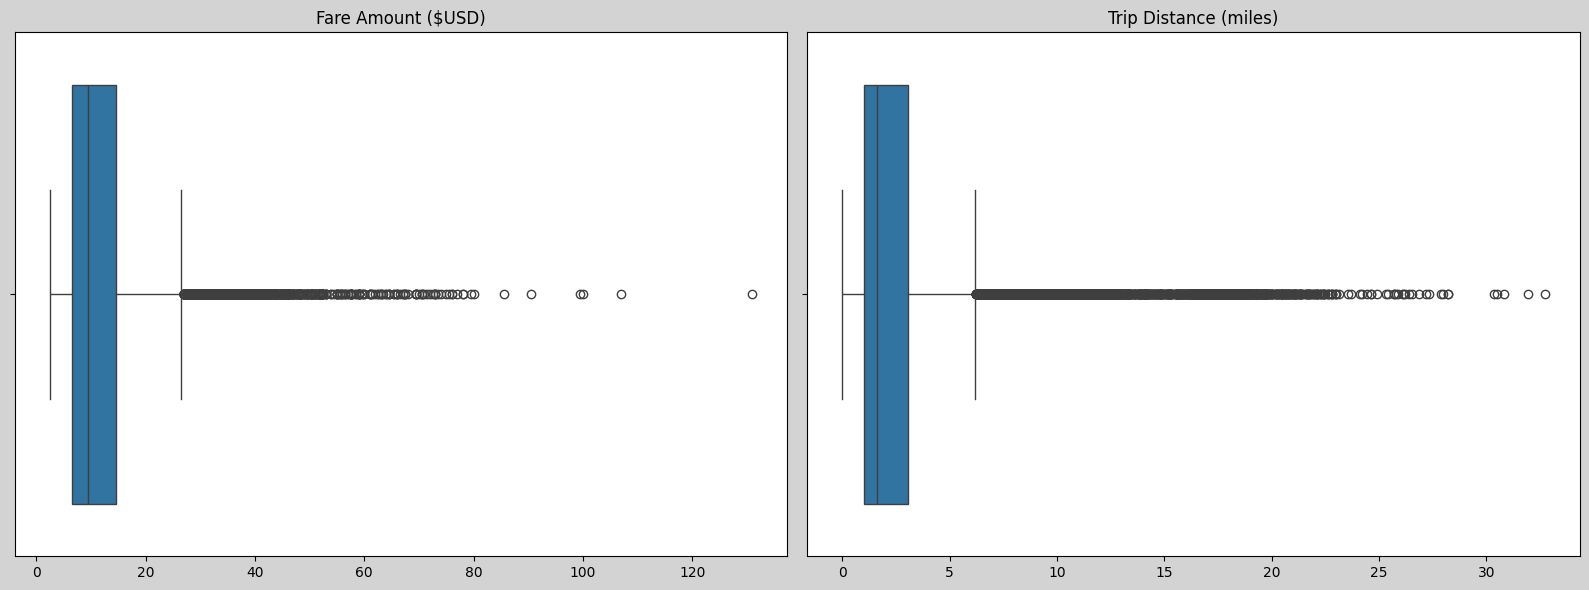

In [21]:
plt.figure(figsize=(16, 6))
plt.gcf().set_facecolor('lightgrey')


plt.subplot(1,2,1)
sns.boxplot(data=df["fare_amount"], orient="h")
plt.title('Fare Amount ($USD)')
plt.xlabel('')


plt.subplot(1, 2, 2)
sns.boxplot(data=df["trip_distance"] , orient="h")
plt.title('Trip Distance (miles)')
plt.xlabel('')



plt.tight_layout()
plt.show()



In [22]:
# Drop the irrelevant fiscal columns now that outliers have been removed
df = df.drop(columns=["extra", "mta_tax", "improvement_surcharge", "tip_amount", "tolls_amount"])

df.head(10)

,VendorID,hour,rush_hour,day,month,passenger_count,trip_distance,ride_rate,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,subtotal,total_amount
0,2,8,0,saturday,march,6,3.34,3.892216,1,100,231,1,13.0,13.8,16.56
1,1,14,0,tuesday,april,1,1.80,8.888889,1,186,43,1,16.0,16.8,20.80
2,1,7,1,friday,december,1,1.00,6.500000,1,262,236,1,6.5,7.3,8.75
3,2,13,0,sunday,may,1,3.70,5.540541,1,188,97,1,20.5,21.3,27.69
4,2,23,0,saturday,april,1,4.37,3.775744,1,4,112,2,16.5,17.8,17.80
5,2,20,0,saturday,march,6,2.30,3.913043,1,161,236,1,9.0,10.3,12.36
6,2,19,1,wednesday,may,1,12.83,3.702260,1,79,241,1,47.5,49.3,59.16
7,2,17,1,tuesday,august,1,2.98,5.369128,1,237,114,1,16.0,17.8,19.58
8,2,16,0,saturday,february,1,1.20,7.500000,1,234,249,2,9.0,9.8,9.80
9,1,15,0,friday,november,1,1.60,8.125000,1,239,237,1,13.0,13.8,16.55


## Summary
We have made quite a few changes to the dataset:
- Remove fares less than $2.50 as they seem generally to be errors
- Removed negative values from all other finance related columns, as well as negative trip distances
- Removed trips with a RatecodeID of 5, as there is no consistent way to predict the rate effect with only 31 trips from various locations
- Removed the rest of the columns which will not be explored
- Added `subtotal` to represent the prices of the trips before tip amount


In [23]:
df.to_csv('taxicab_prepped.csv', index=False)